In [1]:
import numpy as np

print(sys.executable)

#data = np.load("vgg_feature.npy")
#label = np.load("label.npy")

#train_data_EI = np.load("vgg\\train_EI.npy")
#test_data_EI = np.load("vgg\\vgg_feature_test_EI.npy")
#train_label_EI = np.load("vgg\\label_train_EI.npy")
#test_label_EI = np.load("vgg\\label_test_EI.npy")

vgg_original_train_data_MBTI = np.load("vgg\\original\\train_data_MBTI.npy")
vgg_original_test_data_MBTI = np.load("vgg\\original\\test_data_MBTI.npy")
vgg_original_train_label_MBTI = np.load("vgg\\original\\train_label_MBTI.npy")
vgg_original_test_label_MBTI = np.load("vgg\\original\\test_label_MBTI.npy")

vgg_augmented_train_data_MBTI = np.load("vgg\\augmented\\train_data_MBTI.npy")
vgg_augmented_test_data_MBTI = np.load("vgg\\augmented\\test_data_MBTI.npy")
vgg_augmented_train_label_MBTI = np.load("vgg\\augmented\\train_label_MBTI.npy")
vgg_augmented_test_label_MBTI = np.load("vgg\\augmented\\test_label_MBTI.npy")

inception_train_data_MBTI = np.load("inception\\original\\train_data_MBTI.npy")
inception_test_data_MBTI = np.load("inception\\original\\test_data_MBTI.npy")
inception_train_label_MBTI = np.load("inception\\original\\train_label_MBTI.npy")
inception_test_label_MBTI = np.load("inception\\original\\test_label_MBTI.npy")

C:\Users\leeh9\anaconda3\envs\ugrp_3\python.exe


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9992883831854256343
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1408043827
locality {
  bus_id: 1
  links {
  }
}
incarnation: 155044813302641555
physical_device_desc: "device: 0, name: GeForce MX250, pci bus id: 0000:3a:00.0, compute capability: 6.1"
]
0
0.12831858407079647 0.12095588235294118 0.13495575221238937
1
0.1504424778761062 0.10919117647058824 0.11283185840707964
2
0.18141592920353983 0.18088235294117647 0.18141592920353983
3
0.14823008849557523 0.16213235294117648 0.11283185840707964
4
0.1592920353982301 0.16323529411764706 0.15265486725663716
5
0.13938053097345132 0.15698529411764706 0.12831858407079647
6
0.13274336283185842 0.1 0.05088495575221239
7
0.13053097345132744 0.12316176470588236 0.11504424778761062
8
0.07964601769911504 0.12352941176470589 0.06637168141592921
9
0.06858407079646017 0.07904411764705882 0.08185840707964602
                        Classifier  Acc

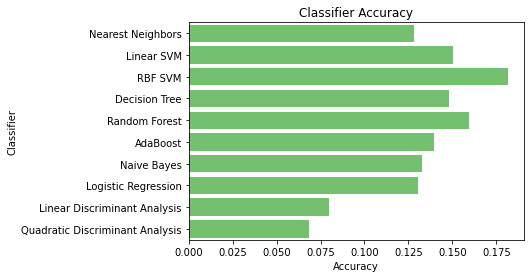

                        Classifier  Accuracy
0                Nearest Neighbors  0.120956
1                       Linear SVM  0.109191
2                          RBF SVM  0.180882
3                    Decision Tree  0.162132
4                    Random Forest  0.163235
5                         AdaBoost  0.156985
6                      Naive Bayes  0.100000
7              Logistic Regression  0.123162
8     Linear Discriminant Analysis  0.123529
9  Quadratic Discriminant Analysis  0.079044


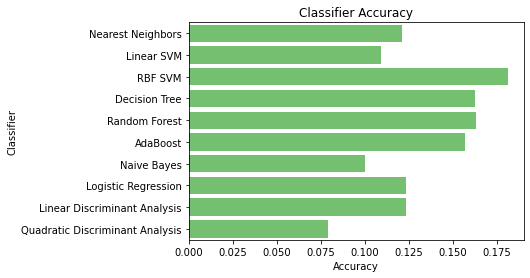

                        Classifier  Accuracy
0                Nearest Neighbors  0.134956
1                       Linear SVM  0.112832
2                          RBF SVM  0.181416
3                    Decision Tree  0.112832
4                    Random Forest  0.152655
5                         AdaBoost  0.128319
6                      Naive Bayes  0.050885
7              Logistic Regression  0.115044
8     Linear Discriminant Analysis  0.066372
9  Quadratic Discriminant Analysis  0.081858


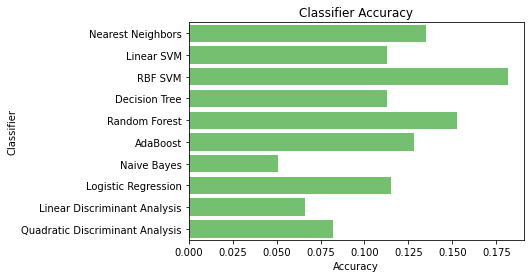

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

####################
#       LDA        #
####################

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Logistic Regression", 
         "Linear Discriminant Analysis", "Quadratic Discriminant Analysis"]
         
classifiers = [
    KNeighborsClassifier(8),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    #GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

log_cols = ["Classifier", "Accuracy"]
vgg_original_log = pd.DataFrame(columns=log_cols)
vgg_augmented_log = pd.DataFrame(columns=log_cols)
inception_log = pd.DataFrame(columns=log_cols)

for i in range(0, len(classifiers)):
    print(i)

#for classifier in classifiers:
    #classifier.fit(train_data_EI, train_label_EI)
    #predict_EI = classifier.predict(test_data_EI)
    #print(accuracy_score(test_label_EI, predict_EI))

    classifier = classifiers[i]
    classifier.fit(vgg_original_train_data_MBTI, vgg_original_train_label_MBTI)
    vgg_original_predict_MBTI = classifier.predict(vgg_original_test_data_MBTI)

    classifier.fit(vgg_augmented_train_data_MBTI, vgg_augmented_train_label_MBTI)
    vgg_augmented_predict_MBTI = classifier.predict(vgg_augmented_test_data_MBTI)

    classifier.fit(inception_train_data_MBTI, inception_train_label_MBTI)
    inception_predict_MBTI = classifier.predict(inception_test_data_MBTI)

    vgg_original_score = accuracy_score(vgg_original_test_label_MBTI, vgg_original_predict_MBTI)
    vgg_augmented_score = accuracy_score(vgg_augmented_test_label_MBTI, vgg_augmented_predict_MBTI)
    inception_score = accuracy_score(inception_test_label_MBTI, inception_predict_MBTI)

    vgg_original_log_entry = pd.DataFrame([[names[i], vgg_original_score]], columns=log_cols)
    vgg_augmented_log_entry = pd.DataFrame([[names[i], vgg_augmented_score]], columns=log_cols)
    inception_log_entry = pd.DataFrame([[names[i], inception_score]], columns=log_cols)
    vgg_original_log = vgg_original_log.append(vgg_original_log_entry, ignore_index=True)
    vgg_augmented_log = vgg_augmented_log.append(vgg_augmented_log_entry, ignore_index=True)
    inception_log = inception_log.append(inception_log_entry, ignore_index=True)

    print(vgg_original_score, vgg_augmented_score, inception_score)

print(vgg_original_log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=vgg_original_log, color="g")  
plt.show()

print(vgg_augmented_log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=vgg_augmented_log, color="g")  
plt.show()

print(inception_log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=inception_log, color="g")  
plt.show()

#lda = LinearDiscriminantAnalysis()
#lda2 = LinearDiscriminantAnalysis()

#lda.fit(train_data_EI, train_label_EI)
#lda_predict_EI = lda.predict(test_data_EI)
#print(accuracy_score(test_label_EI, lda_predict_EI))

#lda2.fit(train_data_MBTI, train_label_MBTI)
#lda2_predict_MBTI = lda2.predict(test_data_MBTI)
#print(accuracy_score(test_label_MBTI, lda2_predict_MBTI))

                         Classifier  Accuracy  \
0                 Nearest Neighbors  0.128319   
1                        Linear SVM  0.150442   
2                           RBF SVM  0.181416   
3                     Decision Tree  0.148230   
4                     Random Forest  0.159292   
5                          AdaBoost  0.139381   
6                       Naive Bayes  0.132743   
7               Logistic Regression  0.130531   
8      Linear Discriminant Analysis  0.079646   
9   Quadratic Discriminant Analysis  0.068584   
10                Nearest Neighbors  0.120956   
11                       Linear SVM  0.109191   
12                          RBF SVM  0.180882   
13                    Decision Tree  0.162132   
14                    Random Forest  0.163235   
15                         AdaBoost  0.156985   
16                      Naive Bayes  0.100000   
17              Logistic Regression  0.123162   
18     Linear Discriminant Analysis  0.123529   
19  Quadratic Discri

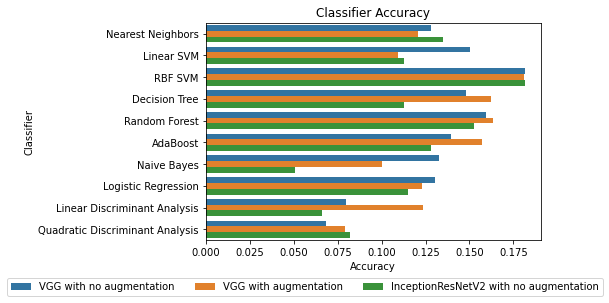

In [41]:
option_1 = ['VGG with no augmentation'] * 10
option_2 = ['VGG with augmentation'] * 10
option_3 = ['InceptionResNetV2 with no augmentation'] * 10

vgg_original_log['Option'] = option_1
vgg_augmented_log['Option'] = option_2
inception_log['Option'] = option_3

n1 = vgg_original_log.append(vgg_augmented_log, ignore_index=True)
df = n1.append(inception_log, ignore_index=True)
print(df)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
#sns.set_color_codes("muted")
ax = sns.barplot(x='Accuracy', y='Classifier', data=df, hue='Option')  
ax.legend(loc='upper right', bbox_to_anchor= (1.2, -0.15), ncol=3)
plt.show()
ax.figure.savefig("output_1.jpg", bbox_inches='tight')
